# Day 26 - Random Forest

## Importing Libraries

In [17]:
# Importing Libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## Importing data set

In [27]:

flower = sns.load_dataset('iris')
print(flower.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


## Making Descriptive and Target Features

In [55]:
descriptive_features = flower.iloc[:,:-1]
descriptive_features


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [29]:
target_feature = flower.iloc[:,-1:]
target_feature

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


## Importing Decision Tree Classifier

n_estimators = This is the number of trees you want to build before taking the maximum voting or averages of predictions. Higher number of trees give you better performance but makes your code slower.

In [30]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100) 
classifier.fit(descriptive_features,target_feature)
classifier.predict([[10,4,2,6]])

/var/folders/dk/9q84mn0j1nzfg85t9zx5d1480000gn/T/ipykernel_53582/3251868607.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(descriptive_features,target_feature)


array(['setosa'], dtype=object)

## Testing on new values

In [31]:
new_values = [[5,4,3,2],[6,7,1,2],[3,2,1,0.2],[6,3,5.2,1.7],[10,9,2,1]]
new_predict = classifier.predict(new_values)
new_predict

array(['versicolor', 'setosa', 'setosa', 'virginica', 'versicolor'],
      dtype=object)

## Splitting data in to Training and Test sets to measure accuracy 80-20

In [36]:
# Splitting data in to 80-20 
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(descriptive_features, target_feature, test_size=1/5)

In [37]:
classifier = RandomForestClassifier(n_estimators=200)
classifier.fit(x_train,y_train)
predicted_values = classifier.predict(x_test)
predicted_values

/var/folders/dk/9q84mn0j1nzfg85t9zx5d1480000gn/T/ipykernel_53582/2129064394.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_train,y_train)


array(['setosa', 'versicolor', 'versicolor', 'versicolor', 'virginica',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'virginica', 'virginica',
       'setosa', 'virginica', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'virginica', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'virginica', 'setosa', 'virginica'],
      dtype=object)

## Measure Accuracy

In [45]:
# Measuring score
import sklearn.metrics 
score = classifier.score(x_test,y_test)
score

0.9333333333333333

In [44]:
# Measuring accuracy score
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test,predicted_values)
acc_score

0.9333333333333333

## Predicting New Values

In [46]:
new_values = [[5,4,3,2],[6,7,1,2],[3,2,1,0.2],[6,3,5.2,1.7],[10,9,2,1]]
new_predict = classifier.predict(new_values)
new_predict

array(['virginica', 'setosa', 'setosa', 'virginica', 'setosa'],
      dtype=object)

## Confusion Matrix


In [47]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predicted_values)
cm

array([[ 5,  0,  0],
       [ 0, 12,  2],
       [ 0,  0, 11]])

## Creating HEATMAP to understand Confusion matrix

Text(0.5, 1.0, 'Accuracy score : 0.9333333333333333')

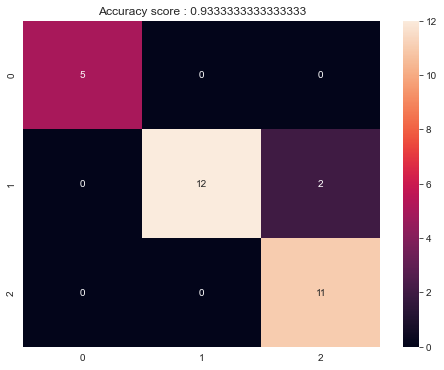

In [49]:
sns.set_style(style='whitegrid')
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot = True,)
plt.ylabel = 'Actual Output'
plt.xlabel = 'Predicted Output'
cm_title = 'Accuracy score : {0}'.format(score)
plt.title(cm_title)

## Random Forest Regression

## Importing data set

In [54]:
df = pd.read_csv('ml_data_salary.csv')
print(df.head(30))

     age  distance  YearsExperience  Salary
0   31.1     77.75              1.1   39343
1   31.3     78.25              1.3   46205
2   31.5     78.75              1.5   37731
3   32.0     80.00              2.0   43525
4   32.2     80.50              2.2   39891
5   32.9     82.25              2.9   56642
6   33.0     82.50              3.0   60150
7   33.2     83.00              3.2   54445
8   33.2     83.00              3.2   64445
9   33.7     84.25              3.7   57189
10  33.9     84.75              3.9   63218
11  34.0     85.00              4.0   55794
12  34.0     85.00              4.0   56957
13  34.1     85.25              4.1   57081
14  34.5     86.25              4.5   61111
15  34.9     87.25              4.9   67938
16  35.1     87.75              5.1   66029
17  35.3     88.25              5.3   83088
18  35.9     89.75              5.9   81363
19  36.0     90.00              6.0   93940
20  36.8     92.00              6.8   91738
21  37.1     92.75              

In [56]:
descriptive_features = df.iloc[:,:-1]
descriptive_features
target_feature = df.iloc[:,-1:]
target_feature


,Salary
0,39343
1,46205
2,37731
3,43525
4,39891
5,56642
6,60150
7,54445
8,64445
9,57189


## Importing Random Forest regression and efficiency measures from sklearn 

In [57]:
# Importing Random Forest regression from sklearn 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

## Fitting RandomForestRegressor Regression to the data set

In [58]:
# Fitting RandomForestRegressor to the data set
regressor = RandomForestRegressor(n_estimators=100)
regressor.fit(descriptive_features, target_feature)

/var/folders/dk/9q84mn0j1nzfg85t9zx5d1480000gn/T/ipykernel_53582/4218445208.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(descriptive_features, target_feature)


RandomForestRegressor()

## Predicting  results

In [59]:
# Predicting the Test set results
y_pred = regressor.predict(descriptive_features)
y_pred

array([ 40732.36      ,  43477.16      ,  39918.52      ,  42154.94      ,
        41753.        ,  57905.88333333,  59344.16333333,  59581.94333333,
        59581.94333333,  58645.12      ,  61338.115     ,  56904.44783333,
        56904.44783333,  56854.50633333,  60371.595     ,  67273.53      ,
        67435.11      ,  78376.11      ,  82947.23      ,  88371.99      ,
        92858.79      ,  96964.97      , 104220.57      , 110469.61      ,
       108456.04      , 106975.37      , 115457.05      , 113680.11      ,
       121376.52      , 121158.54      ])

## Score of model

In [60]:
regressor.score(descriptive_features,target_feature)

0.9922976984985019

## Evaluation by Mean Squared Error

In [61]:
## Evaluation by Mean Squared Error
#computing the squared error of the first model
print("Mean squared error model 1: %.2f" % mean_squared_error(target_feature, y_pred))
print("Mean Absolute error model 1: %.2f" % mean_absolute_error(target_feature, y_pred))

Mean squared error model 1: 5595716.35
Mean Absolute error model 1: 1878.31


## Splitting data set in training and testing data

In [63]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(descriptive_features, target_feature, test_size=1/5, random_state=0)

## Fitting RandomForestRegressor on training Data

In [64]:
# Fitting RandomForestRegressor to the Training set
regressor = RandomForestRegressor(n_estimators=100)
regressor.fit(x_train, y_train)

/var/folders/dk/9q84mn0j1nzfg85t9zx5d1480000gn/T/ipykernel_53582/2692314101.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(x_train, y_train)


RandomForestRegressor()

## Predicting test results

In [65]:
# Predicting the Test set results
y_pred = regressor.predict(x_test)

In [66]:

y_pred 

array([ 44388.39      , 118552.71      ,  56845.98983333,  56607.8665    ,
       111833.34      , 107646.45      ])

## Measure Accuracy

In [69]:
# Measuring score
import sklearn.metrics 
score = regressor.score(x_test,y_test)
score

0.9796478131474032